# Decision Trees

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

Some advantages of decision trees are:
<ul class="simple">
<li><p>Simple to understand and to interpret. Trees can be visualized.</p></li>
<li><p>Requires little data preparation. Other techniques often require data
normalization, dummy variables need to be created and blank values to
be removed. Note however that this module does not support missing
values.</p></li>
<li><p>The cost of using the tree (i.e., predicting data) is logarithmic in the
number of data points used to train the tree.</p></li>
<li><p>Able to handle both numerical and categorical data. However scikit-learn
implementation does not support categorical variables for now. Other
techniques are usually specialized in analyzing datasets that have only one type
of variable.
<li><p>Able to handle multi-output problems.</p></li>
<li><p>Uses a white box model. If a given situation is observable in a model,
the explanation for the condition is easily explained by boolean logic.
By contrast, in a black box model (e.g., in an artificial neural
network), results may be more difficult to interpret.</p></li>
<li><p>Possible to validate a model using statistical tests. That makes it
possible to account for the reliability of the model.</p></li>
<li><p>Performs well even if its assumptions are somewhat violated by
the true model from which the data were generated.</p></li>
</ul>

The disadvantages of decision trees include:
<ul class="simple">
<li><p>Decision-tree learners can create over-complex trees that do not
generalize the data well. This is called overfitting. Mechanisms
such as pruning, setting the minimum number of samples required
at a leaf node or setting the maximum depth of the tree are
necessary to avoid this problem.</p></li>
<li><p>Decision trees can be unstable because small variations in the
data might result in a completely different tree being generated.
This problem is mitigated by using decision trees within an
ensemble.</p></li>
<li><p>Predictions of decision trees are neither smooth nor continuous, but
piecewise constant approximations as seen in the above figure. Therefore,
they are not good at extrapolation.</p></li>
<li><p>The problem of learning an optimal decision tree is known to be
NP-complete under several aspects of optimality and even for simple
concepts. Consequently, practical decision-tree learning algorithms
are based on heuristic algorithms such as the greedy algorithm where
locally optimal decisions are made at each node. Such algorithms
cannot guarantee to return the globally optimal decision tree.  This
can be mitigated by training multiple trees in an ensemble learner,
where the features and samples are randomly sampled with replacement.</p></li>
<li><p>There are concepts that are hard to learn because decision trees
do not express them easily, such as XOR, parity or multiplexer problems.</p></li>
<li><p>Decision tree learners create biased trees if some classes dominate.
It is therefore recommended to balance the dataset prior to fitting
with the decision tree.</p></li>
</ul>

## Classification

`DecisionTreeClassifier` is a class capable of performing multi-class classification on a dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Once trained, you can plot the tree with the `plot_tree` function:

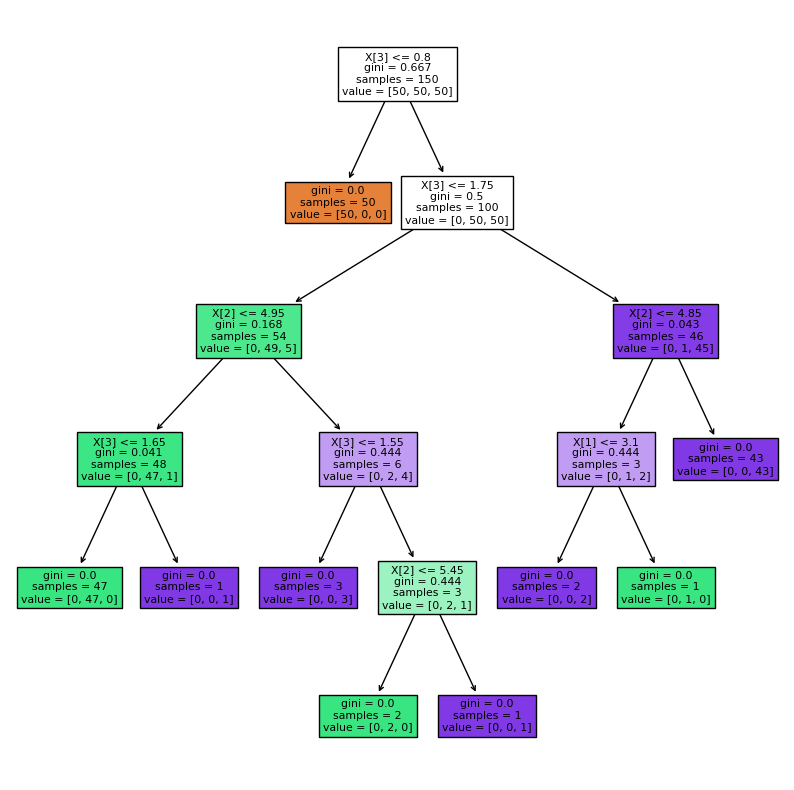

In [7]:
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True);

We can also export the tree in `Graphviz` format using the `export_graphviz` exporter.

In [10]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

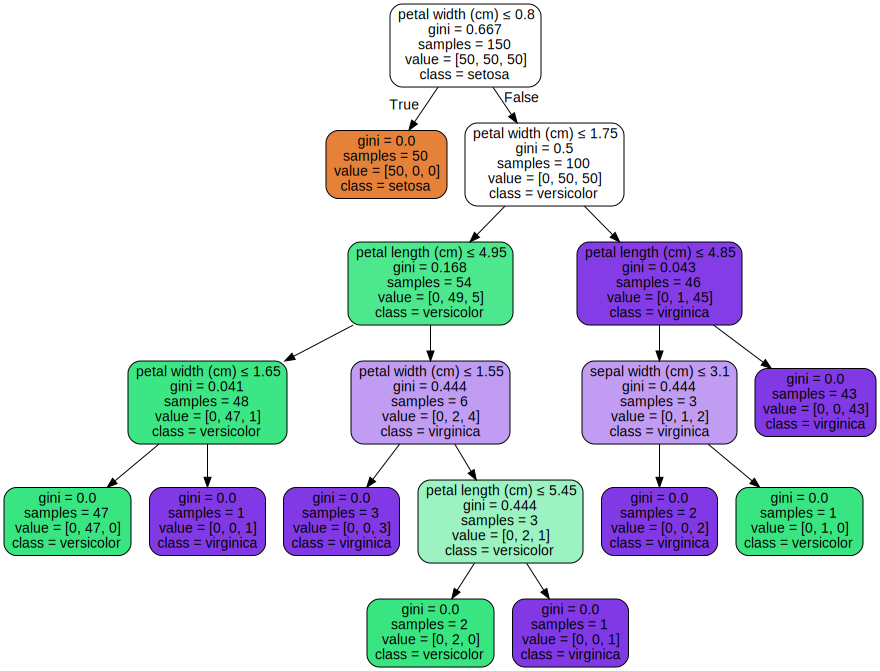

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Alternatively, the tree can also be exported in textual format with the function export_text

In [16]:
r = tree.export_text(clf, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Regression

Decision trees can also be applied to regression problems, using the `DecisionTreeRegressor` class.

## Complexity

In general, the run time cost to construct a balanced binary tree is $O(n_{samples}n_{features}\log(n_{samples}))$ and query time $O(\log(n_{samples}))$. Although the tree construction algorithm attempts to generate balanced trees, they will not always be balanced. Assuming that the subtrees remain approximately balanced, the cost at each node consists of searching through $O(n_{features})$ to find the feature that offers the largest reduction in the impurity criterion, e.g. log loss (which is equivalent to an information gain). This has a cost of $O(n_{features}n_{samples}\log(n_{samples}))$ at each node, leading to a total cost over the entire trees (by summing the cost at each node) of $O(n_{features}n_{samples}^{2}\log(n_{samples}))$.

## Tree Algorithms

### ID3

ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalize to unseen data.

### C4.5

C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

### C5.0

C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

### CART

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

>scikit-learn uses an optimized version of the CART algorithm.

## DecisionTreeClassifier

### Parameters of DecisionTreeClassifier

Here are some parameters of the DecisionTreeClassifier:
* **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”
  
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain
* **splitter**: {“best”, “random”}, default=”best”
  
    The strategy to choose the best split. Supported strategies are “best” to choose the best split and “random” to choose at random.
* **max_depth**: int, default=None
  
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
* **min_samples_split**: int, default=2
    
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.

    - If float, then `min_samples_split` is a fraction and ceil(`min_samples_split` * n_samples) are the minimum number of samples for each split.
* **max_features**: int, float or {“auto”, “sqrt”, “log2”}, default=None
  
    The number of features to consider when looking for the best split:
  
    - If int, then consider `max_features` features at each split.
  
    - If float, then `max_features` is a fraction and `int(max_features * n_features)` features are considered at each split.
  
    - If “auto”, then `max_features=sqrt(n_features)`.
  
    - If “sqrt”, then `max_features=sqrt(n_features)`.
  
    - If “log2”, then `max_features=log2(n_features)`.
  
    - If None, then `max_features=n_features`.
* **max_leaf_nodes**: int, default=None
  
    Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
* **min_impurity_split**: float, default=0
  
    Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
* **class_weight**: dict, list of dicts, “balanced”, or None, default=None
  
    Weights associated with classes in the form ``{class_label: weight}``. If not given, all classes are supposed to have weight one.
    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

### Attributes of DecisionTreeClassifier

Here are some attributes of the DecisionTreeClassifier:
* **classes_**: array of shape = [n_classes] or a list of string labels
  
    The classes labels (single output problem), or list of class labels (multi-output problem).
* **feature_importances_**: array of shape = [n_features]
  
    The feature importances. The higher, the more important the feature.
* **max_features_**: int
    
    The inferred value of max_features.
* **n_classes_**: int
  
    The number of classes.

## DecisionTreeRegressor

### Parameters of DecisionTreeRegressor

The parameters of the `DecisionTreeRegressor` are the same as the `DecisionTreeClassifier` with some changes:
* **criterion**: {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
  
    “squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, “absolute_error” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson” which uses reduction in Poisson deviance to find splits.

### Attributes of DecisionTreeRegressor

Same as the `DecisionTreeClassifier` except the `classes_` attribute.